## Introduction
- Before handling Multiple Linear Regression, it's important to first understand Simple Linear Regression. The Assumption at this point therefore is that you've understood Simple Linear Regression
- The main difference between Simple Linear Regression and Multiple Linear Regression is that in Multiple Linear Regression we are adding the number of independent variables to more than one to predict the outcome

---

# Modeling using Multiple Linear Regression

## About our DataSet
- We are going to predict the price of a house given a number of variables such as number of rooms, bedrooms, age of house etc


## 1. Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot  import figure 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


## 2. Load dataset

In [33]:
df=pd.read_csv('USA_HousePricing.csv')

## 3. Exploratory Analysis

In [34]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [35]:
## Number of rows and columns
df.shape

(5000, 7)

In [36]:
## Statistical analysis
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [37]:
## Check if we have missing values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [39]:
del df['Address']

## Findings
- Our dataset has no missing values
- We have 5000 columns and 5 rows
- Our rows have been set with the correct datatype.

array([[<AxesSubplot:xlabel='Avg. Area Income', ylabel='Avg. Area Income'>,
        <AxesSubplot:xlabel='Avg. Area House Age', ylabel='Avg. Area Income'>,
        <AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Avg. Area Income'>,
        <AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Avg. Area Income'>,
        <AxesSubplot:xlabel='Area Population', ylabel='Avg. Area Income'>,
        <AxesSubplot:xlabel='Price', ylabel='Avg. Area Income'>],
       [<AxesSubplot:xlabel='Avg. Area Income', ylabel='Avg. Area House Age'>,
        <AxesSubplot:xlabel='Avg. Area House Age', ylabel='Avg. Area House Age'>,
        <AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Avg. Area House Age'>,
        <AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Avg. Area House Age'>,
        <AxesSubplot:xlabel='Area Population', ylabel='Avg. Area House Age'>,
        <AxesSubplot:xlabel='Price', ylabel='Avg. Area House Age'>],
       [<AxesSubplot:xlabel='Avg. Area Incom

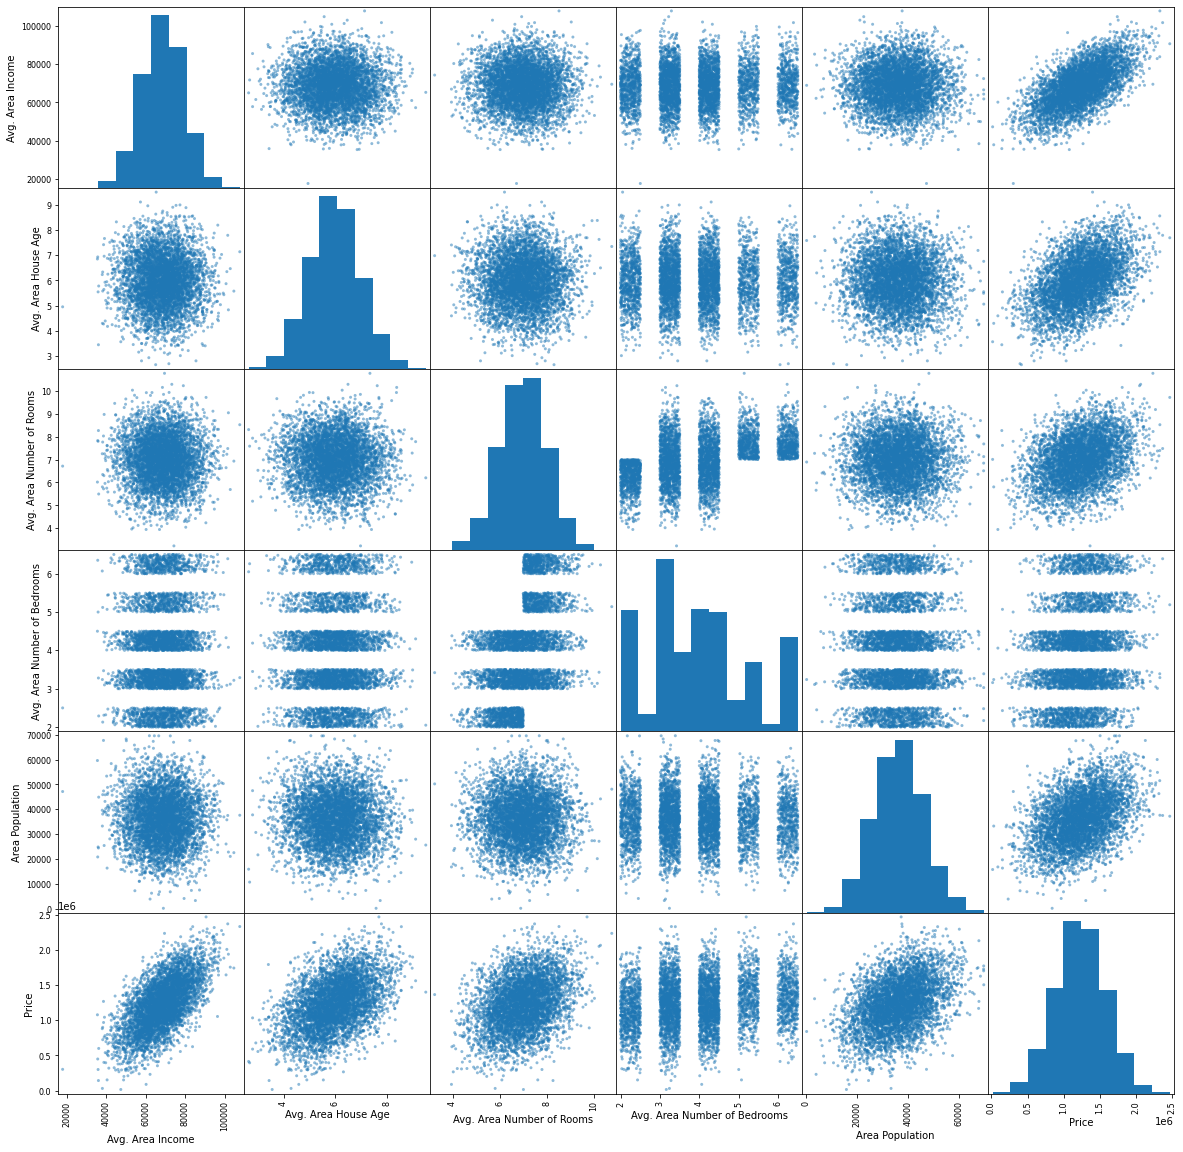

In [40]:
## Explore if there is a pattern/relationship between the variables
pd.plotting.scatter_matrix(df, figsize=(20,20))

## Findings
- When we look at the last row, we can see there is an identifiable pattern among our 5 variables when compared with price(variable to be predicted).
- We will therefore include all the 5 variables in our model

## HeatMap to Analyze Correlation

In [41]:
df_heat=df.corr()

<AxesSubplot:>

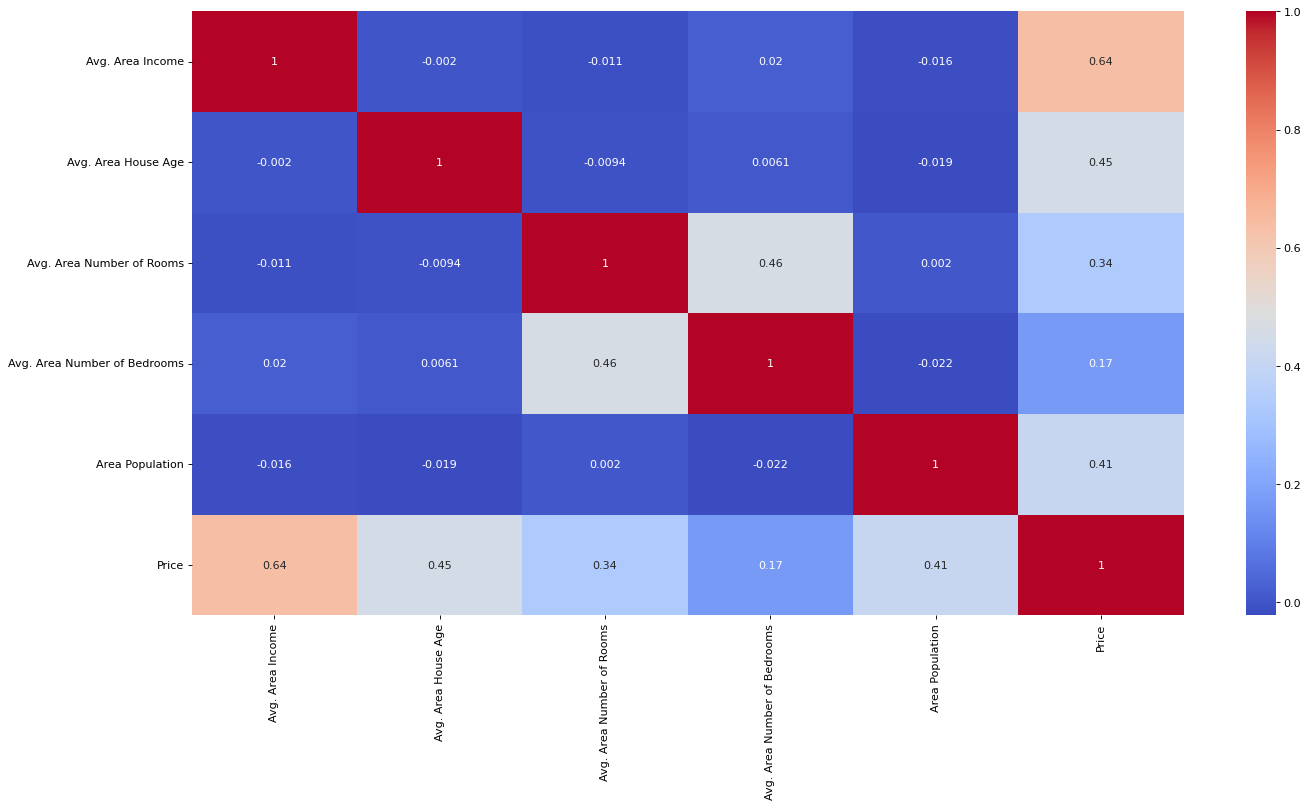

In [42]:
figure(figsize=(20,10),dpi=80)
sns.heatmap(df_heat,annot=True,cmap='coolwarm')

## 4. Linear Regression using S-klearn

# sklearn.linear_model.LinearRegression
- We will use sklearn's linear_module to fit and predict our module.

### Fit function
- It has an inbuilt fit function that usesdata provided to find the best model parameters. It expects two arguments:
- X : Data to be used to predict
- y : Actual values of the target variable

## Predict Function
- THis inbuilt function gives us the predicted values using the linear regression equation. It expects one argument:
 - X(Independent variables that will be used to predict)

### Set X and y variables

In [43]:
## Split our DataFrame into Xs and Y
X=df.drop(columns=(['Price']))
y=df[['Price']]


In [44]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [45]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


In [15]:
## Split the data into training and test sets using a standard 70/30 split.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

## 6. Build the Model

In [47]:
## Linear Regression Model Fitting
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

##  7.  Find y-intercept and X coefficients

In [48]:
#Find y-intercept
lr.intercept_

array([-2638163.62325944])

In [49]:
lr.coef_

array([[2.15985144e+01, 1.65641394e+05, 1.20514981e+05, 4.78556603e+02,
        1.53645374e+01]])

In [50]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


## 8. Predict

In [51]:
new_house = [
79545.45857, #Income
5.682861, #House Age
7.009188, #Number of Rooms
4.09, #Bedrooms
23086.80050   #Area Population  
]

new_house_predict = lr.predict([new_house])
new_house_predict

array([[1222604.59033997]])

The predicted value of this house is $1222604.59033997.

The actual value of this house, according to the dataset, is $10590 340.

## 9. Evaluating Regression Model

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

In [52]:
prediction = lr.predict(X_test)

#  A. Mean absolute error

- Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value
- The Mean Absolute Error(MAE) is the average of all absolute errors. 

In [53]:
metrics.mean_absolute_error(y_test, prediction)

81349.24091305827

### Interpretation
The mean absolute error is 81349.24091305827, which means that the model miscalculated the actual property listing’s price by approximately $81349 on average

# B. Mean Squared Error
- The mean squared error (MSE) tells you how close a regression line is to a set of points.The lower the MSE, the better the forecast.
- The smaller the mean squared error, the closer you are to finding the line of best fit.

In [54]:
metrics.mean_squared_error(y_test, prediction)

10408992253.673334

# C. Median Absolute Error
- MSE and MAE, are usually highly affected by outliers.Outliers are one of the causes of pushing mean loss value up. We therefore calculate the median absolute loss which usually drops the mean absolute error

In [58]:
median_abs_loss = median_absolute_error(y_test, prediction)
print('Median abs loss = ',median_abs_loss)

Median abs loss =  68189.00263956026


## R Squared Score
- R-squared also known as coefficient of determination is a statistical measure that tells us the strength of the relationship between a model and the dependent (predicted) variable. It measures the proportion of the variation in the dependent variable that can be explained by the model. It is also known as the goodness of fit of a model.
- It's value ranges from 0 to 1 where 0 indicates that the outcome cannot be predicted by any of the independent variables and 1 indicates that the outcome can be predicted without error from the independent variables

In [59]:
from sklearn.metrics import r2_score

In [61]:
r2 = r2_score(y_test, prediction)
print('R2 = ',r2)

R2 =  0.9159275718451265


## Interpration

A value of 0.9159275718451265 or 92 means that the variables in our model can account for 91% of the variation in the price of houses.

However, this does not mean that our model is 92% accurate. Higher R squared values do not guarantee reliable and accurate models. 